## Introduction

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform

## Business Understanding

You work for the LendingClub company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a      financial loss for the company

## Data Description

	LoanStatNew	   Description
0.	loan_amnt:	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department         reduces the loan amount, then it will be reflected in this value.
1.	term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
2.	int_rate:	Interest Rate on the loan
3.	installment:	The monthly payment owed by the borrower if the loan originates.
4.	grade:	LC assigned loan grade
5.	sub_grade:	LC assigned loan subgrade
6.	emp_title:	The job title supplied by the Borrower when applying for the loan.*
7.	emp_length:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means     ten or more years.
8.	home_ownership:	The home ownership status provided by the borrower during registration or obtained from the credit report.     Our values are: RENT, OWN, MORTGAGE, OTHER
9.	annual_inc:	The self-reported annual income provided by the borrower during registration.
10.	verification_status:	Indicates if income was verified by LC, not verified, or if the income source was verified
11.	issue_d:	The month which the loan was funded
12.	loan_status:	Current status of the loan
13.	purpose:	A category provided by the borrower for the loan request.
14.	title:	The loan title provided by the borrower
15.	addr_state:	The state provided by the borrower in the loan application
16.	dti:- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding             mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line:	The month the borrower's earliest reported credit line was opened
18.	open_acc:	The number of open credit lines in the borrower's credit file.
19.	pub_rec:	Number of derogatory public records
20.	revol_bal:	Total credit revolving balance
21.	revol_util:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available           revolving credit.
22.	total_acc:	The total number of credit lines currently in the borrower's credit file
23.	initial_list_status:	The initial listing status of the loan. Possible values are – W, F
24.	application_type:	Indicates whether the loan is an individual application or a joint application with two co-borrowers
25.	mort_acc:	Number of mortgage accounts.
26.	pub_rec_bankruptcies:	Number of public record bankruptcies.

In [1]:
#  from google.colab import drive
#  drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
plt.rcParams['figure.figsize']=(8,5)
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,  recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [87]:
# path="/content/drive/MyDrive/lending_club_loan_two.csv"
# df=pd.read_csv(path)
# df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,1/15/2023,Fully Paid,vacation,Vacation,26.24,6/1/1990,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,1/15/2023,Fully Paid,debt_consolidation,Debt consolidation,22.05,7/4/2023,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,1/15/2023,Fully Paid,credit_card,Credit card refinancing,12.79,8/7/2023,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,11/14/2023,Fully Paid,credit_card,Credit card refinancing,2.60,9/6/2023,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,4/13/2023,Charged Off,credit_card,Credit Card Refinance,33.95,3/1/1999,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df=pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,01-01-2015,Fully Paid,vacation,Vacation,26.24,01-06-1990,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,01-01-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,01-07-2004,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,01-01-2015,Fully Paid,credit_card,Credit card refinancing,12.79,01-08-2007,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,01-11-2014,Fully Paid,credit_card,Credit card refinancing,2.60,01-09-2006,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,01-04-2013,Charged Off,credit_card,Credit Card Refinance,33.95,01-03-1999,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


1. We are reading the dataset ‘lending_club_loan_two.csv ’and displaying all the first five rows and columns of the dataset using head() 

In [4]:
print('shape of the data:',df.shape)
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

shape of the data: (396030, 27)
Number of rows: 396030
Number of columns: 27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

1. There are null values/missing values present in the dataset
2. Total memory usage is 81.6+ MB
3. There are 7 floating datatypes,5 integer and 15 object. i.e., categorical

# Statistics about the numerical features in the dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


•	Through five-point summary we get to know the count, mean, std, min, max values of numerical features 

In [7]:
df.describe(include=object).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173103,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,10/14/2023,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [4]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x[-4:])
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: object

In [5]:
df['earliest_cr_line']=df['earliest_cr_line'].astype(int)

**These are basically time-stamps of the customer when their first credit line was opened. We will extract only the year from those tim stamps.**

# Change the datatype of column 

In [6]:
df.emp_length=df.emp_length.str.extract('(\d+)')
df.term=df.term.str.extract('(\d+)')

In [11]:
# df.term=df.term.apply(lambda x:x/12).astype(int)

**\d is called a character class and will match digits. It is equal to [0-9].+ matches 1 or more occurrences of the character before.So \d+ means match 1 or more digits**

# Redundant columns 

In [12]:
df.emp_title.nunique()

173103

**there are too many unique job titles to try to convert this to a dummy variable feature and due to this there will be a curse of dimensionality. Let's remove that emp_title column**

**The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.**

In [7]:
# removing issue_d ,earliest_cr_line,address columns as thet are of no use in defaulter prediciton
df.drop(df[['emp_title','title','issue_d']],axis=1,inplace=True)

In [14]:
#2.drop columns pub_rec and open_acc.

In [15]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36,11.44,329.48,B,B4,10,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,1990,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36,11.99,265.68,B,B5,4,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,2023,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [16]:
df.shape

(396030, 24)

# finding null percentage in each column

In [17]:
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
mort_acc,37795,9.543469
emp_length,18301,4.621115
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
loan_amnt,0,0.000000
earliest_cr_line,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000
total_acc,0,0.000000
revol_bal,0,0.000000


**The above output shows that there are some variable which contain missing values in the data.**

In [18]:
# Treating 

In [8]:
#df.emp_length.replace(np.nan,0,inplace=True)
df['emp_length'].fillna(df.emp_length.median(),inplace=True)

In [9]:
df.revol_bal.fillna(df.revol_bal.median(),inplace=True)
df.revol_util.fillna(df.revol_util.median(),inplace=True)
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0],inplace=True)
df.mort_acc.fillna(df.mort_acc.median(),inplace=True)

In [21]:
# total_acc_avg = df.groupby(by='total_acc').mean().mort_acc

In [22]:
# def fill_mort_acc(total_acc, mort_acc):
#     if np.isnan(mort_acc):
#         return total_acc_avg[total_acc].round()
#     else:
#         return mort_acc

In [23]:
# df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [10]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [11]:
df.emp_length=df.emp_length.astype(int)

In [12]:
df_features=df.drop('loan_status',axis=1)
df_target=df.loan_status

# outlier features

In [13]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include=object)

In [28]:
df_num.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
numerical_cols=df_num.columns
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

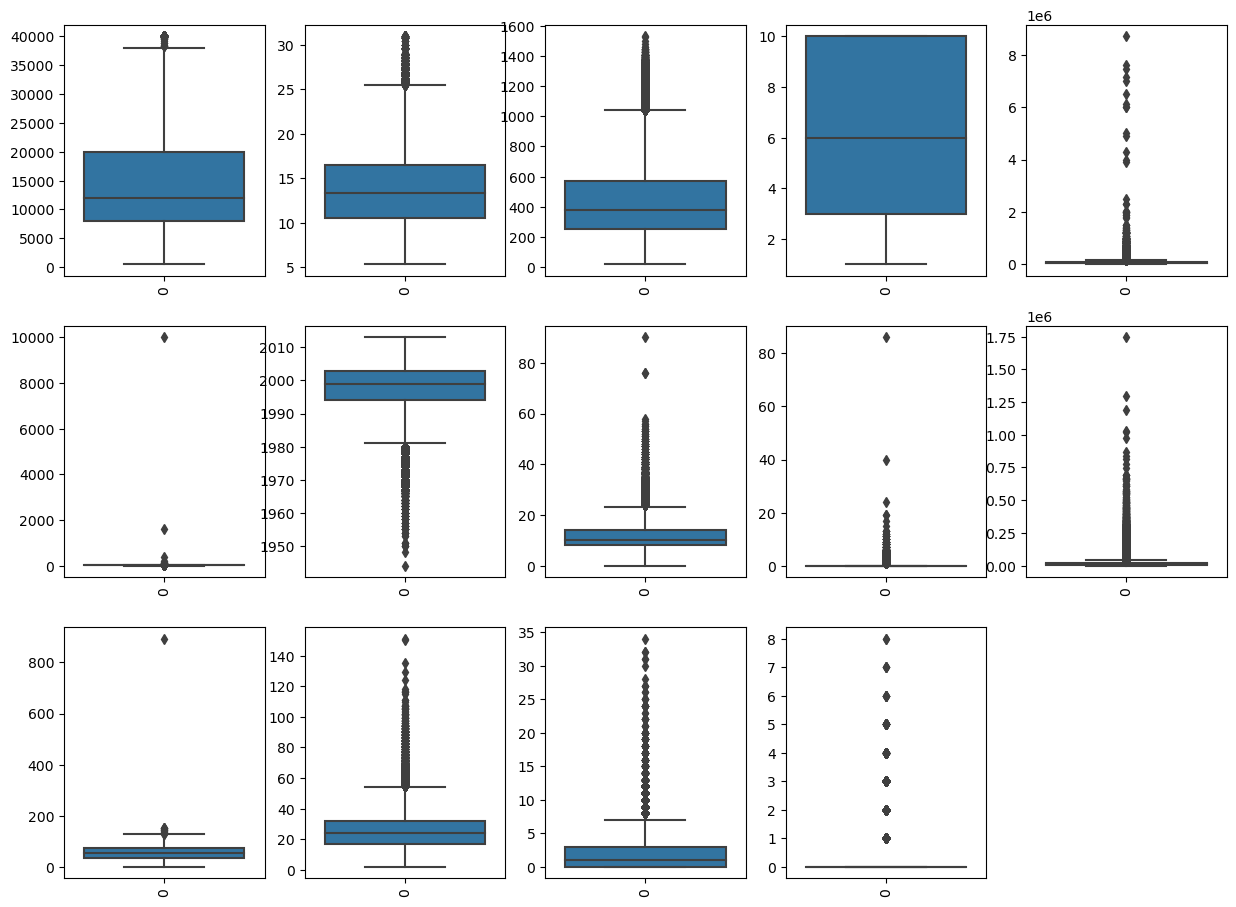

<Figure size 800x500 with 0 Axes>

In [16]:
t=1
plt.figure(figsize=(15,15))
for i in df_num:
    plt.subplot(4,5,t)
    sns.boxplot(df[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

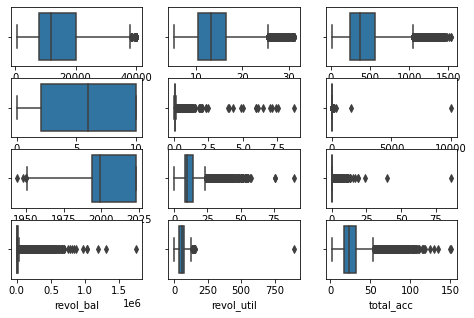

In [29]:
fig,ax=plt.subplots(4,3,figsize=(8,5))

for i ,subplot in zip(df_num,ax.flatten()):
    sns.boxplot(df_num[i],ax=subplot)

# Complexity Involved

<AxesSubplot:>

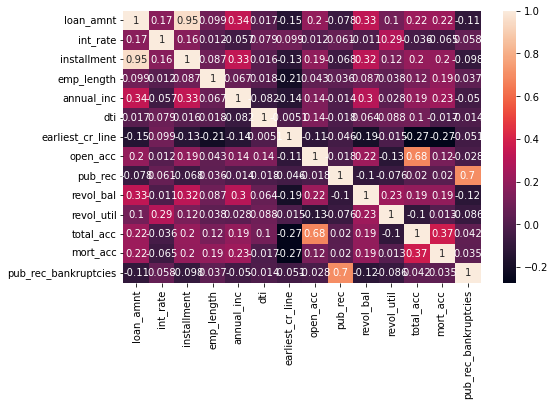

In [30]:
sns.heatmap(df.corr(),annot=True)

**An interesting fact to note here is that the loan_amnt and installment features are very highly correlated with each other. This is quite logical because the higher the loan amount, higher will be the installment and vice versa.**

1. From heatmap we don’t see any strong correlation of any predictors with the target variable which is complexity .
2. We see there  is no correlation between target and other  predictors
3. Loan _amt and installment  is highly   correlated having value 0.95
4. Pub_rec_bankrupties and pub_rec has high collinearity with value 0.7
5. total_acc and open_acc has moderate corelationship of 0.68
6. All other attributes are having weak corelationship as evident from above graph

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table between the dependent variable and each independent variable
for col in df.columns:
    if col != 'loan_status':
        contingency_table = pd.crosstab(df[col], df['loan_status'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(col, "p-value:", p)

loan_amnt p-value: 0.0
term p-value: 0.0
int_rate p-value: 0.0
installment p-value: 0.0
grade p-value: 0.0
sub_grade p-value: 0.0
emp_length p-value: 1.0125853056282691e-84
home_ownership p-value: 0.0
annual_inc p-value: 1.0041799412989809e-48
verification_status p-value: 0.0
purpose p-value: 6.573354783158025e-291
dti p-value: 0.0
earliest_cr_line p-value: 9.770732593296198e-141
open_acc p-value: 3.2501317050944036e-47
pub_rec p-value: 3.1977870014319198e-31
revol_bal p-value: 0.9999960266411639
revol_util p-value: 1.0048749993313651e-287
total_acc p-value: 6.100571917442791e-20
initial_list_status p-value: 2.408916483118551e-09
application_type p-value: 1.1418557766942247e-13
mort_acc p-value: 0.0
pub_rec_bankruptcies p-value: 3.601584974044421e-07
address p-value: 0.18511571879723165


**This code will create a contingency table between the dependent variable and each independent variable,and then perform a chi-square test to determine the p-value of the test. A low p-value indicates that there is a 
significant association between the independent variable and the dependent variable**

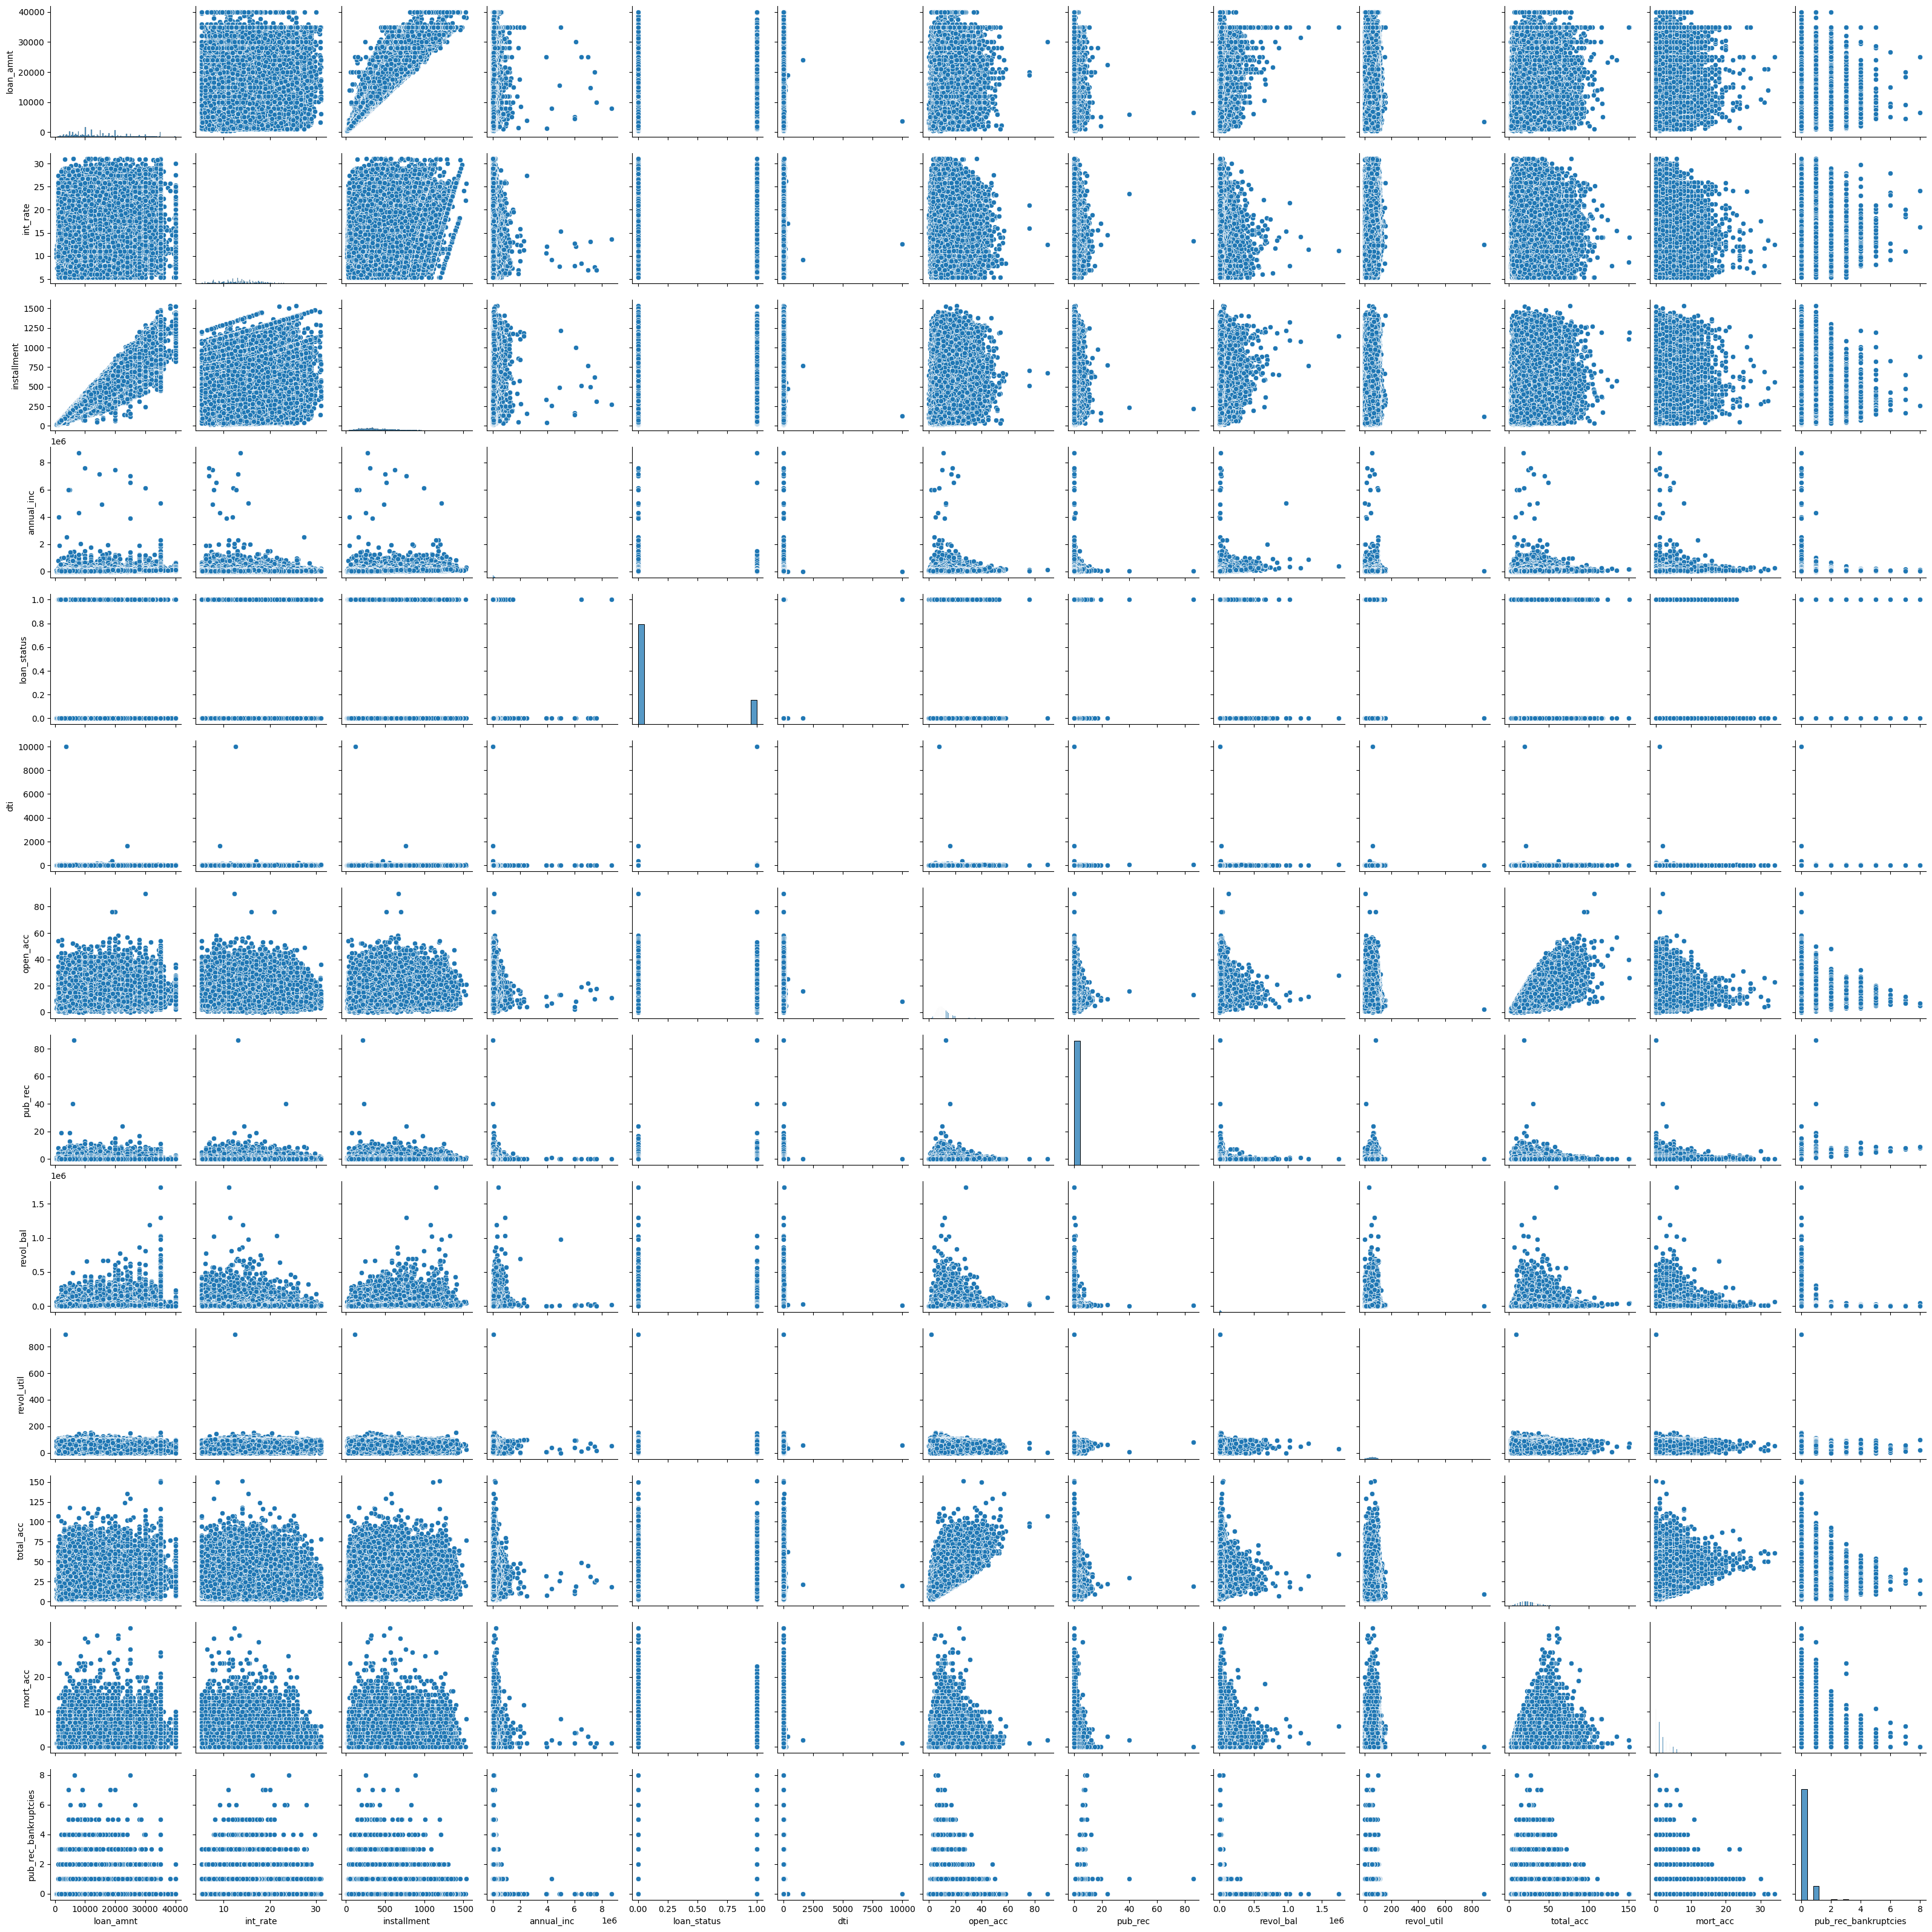

In [ ]:
sns.pairplot(df)

# Data Exploration (EDA)
Relation between variables - Univariate Analysis for numerical features Numeric Feature:

In [ ]:
# t=1
# plt.figure(figsize=(15,15))
# for i in df_num:
#     plt.subplot(5,4,t)
#     sns.distplot(df_num[i])
#     plt.xticks(rotation=90)
#     t+=1
# plt.show()
# plt.tight_layout()

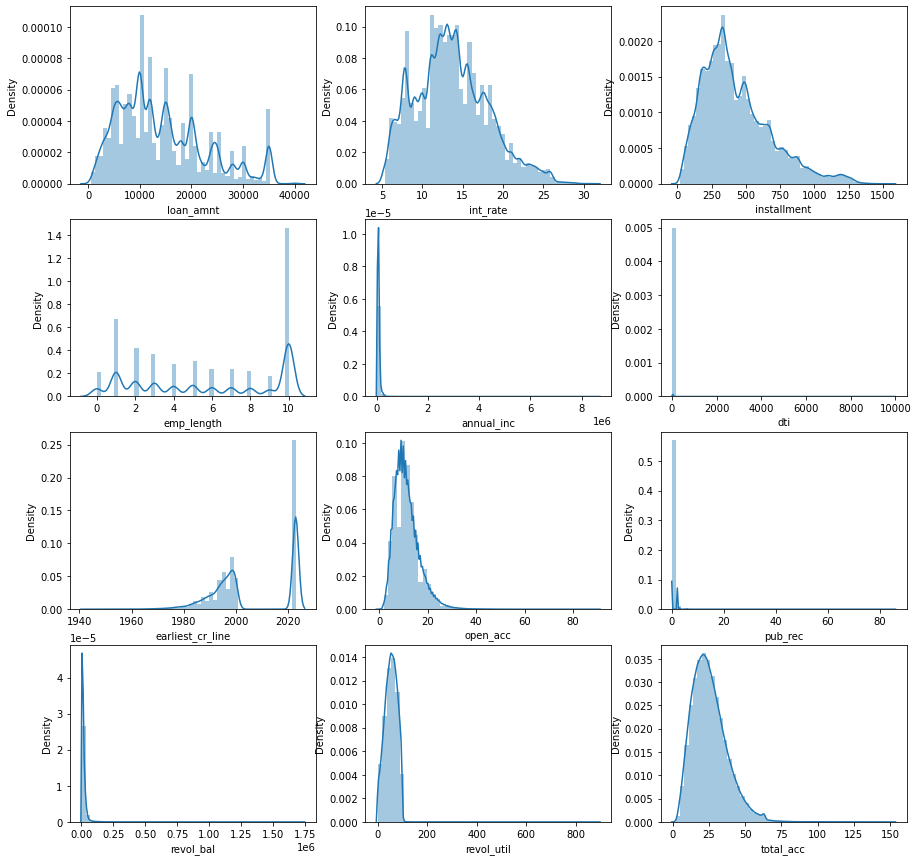

In [31]:
fig,ax=plt.subplots(4,3,figsize=(15,15))

for i ,subplot in zip(df_num,ax.flatten()):
    sns.distplot(df_num[i],ax=subplot)

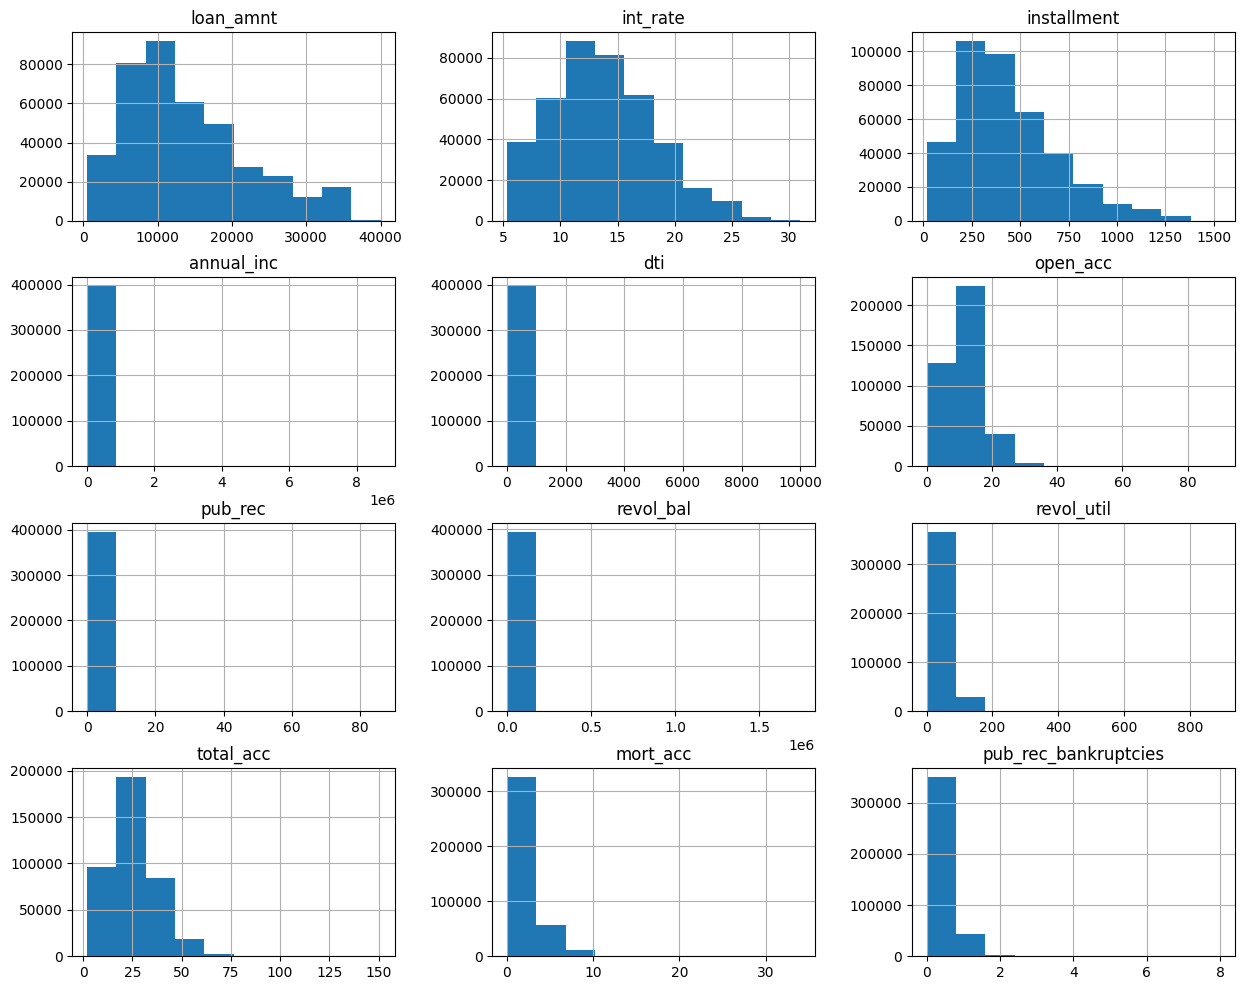

In [ ]:
df_num.hist()
plt.show()

# Relation between variables - Analysis for Categorical features

In [32]:
df_cat=df.select_dtypes(include=object)
df_cat.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [33]:
df_cat1=['term', 'grade',  'home_ownership','purpose','emp_length',
       'verification_status', 'initial_list_status','application_type']

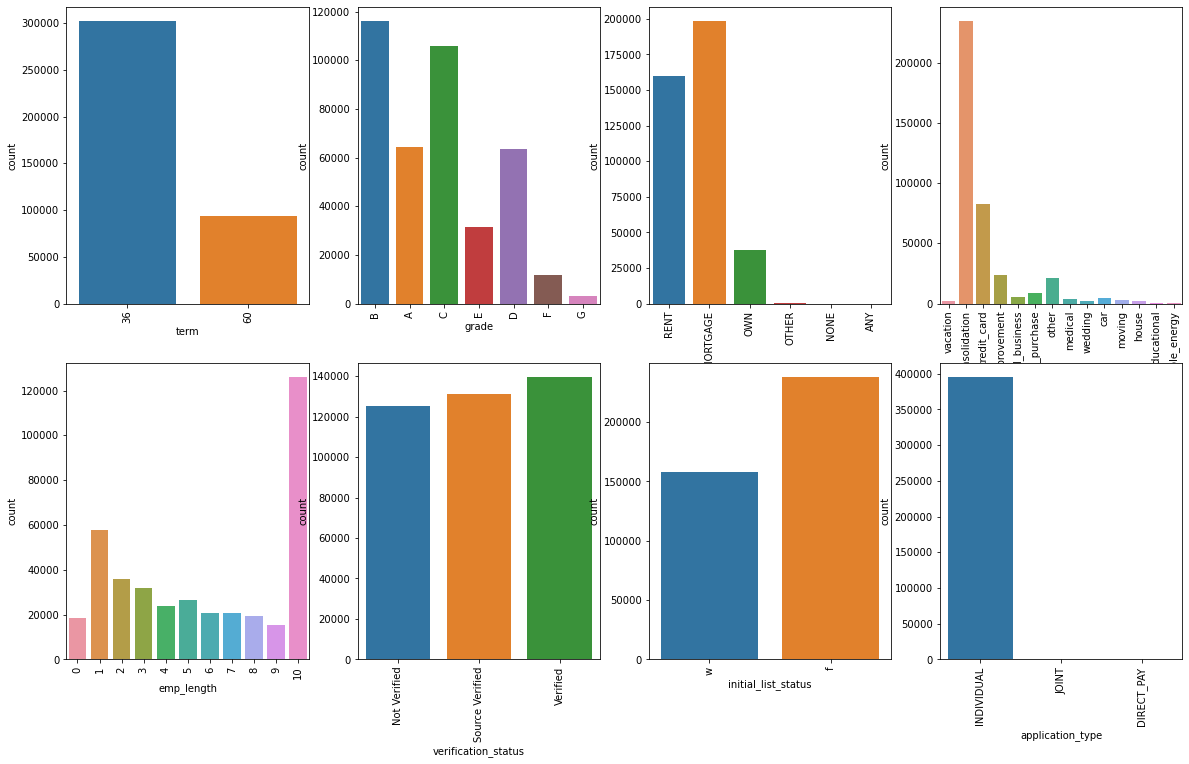

<Figure size 576x360 with 0 Axes>

In [34]:
t=1
plt.figure(figsize=(20,12))
for i in df_cat1:
    plt.subplot(2,4,t)
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

<Axes: xlabel='loan_status', ylabel='count'>

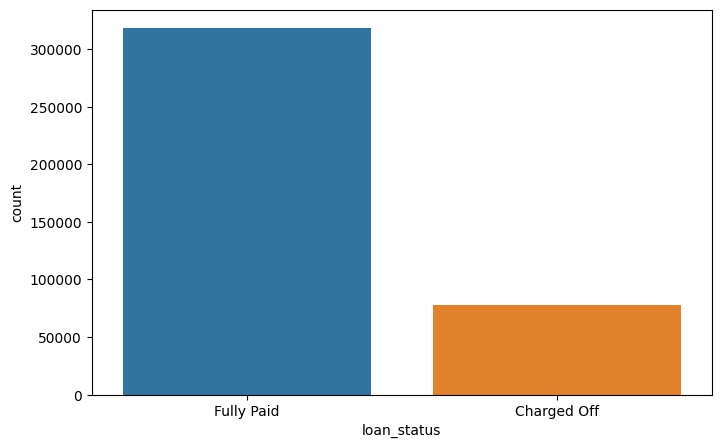

In [109]:
sns.countplot(x=df.loan_status)

**Count of fully paid customer has more as compared to charged off**

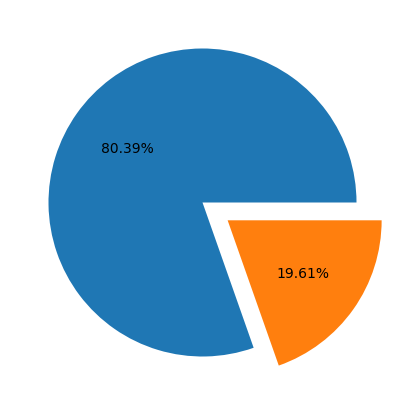

In [114]:
count=df.loan_status.value_counts()
plt.pie(count,autopct='%1.2f%%',explode=[0,0.2])
plt.show()

We see maximum count of full paid loans .This is target column and  has been converted to integer 1 and 0 .Fully paid has been converted to 0  and charged off has been converted to 1.
The percentage of fully paid customer are 80.39% whereas the percentage of charged of is 19.61%

# BIVARIATE ANALYSIS

<Axes: xlabel='term'>

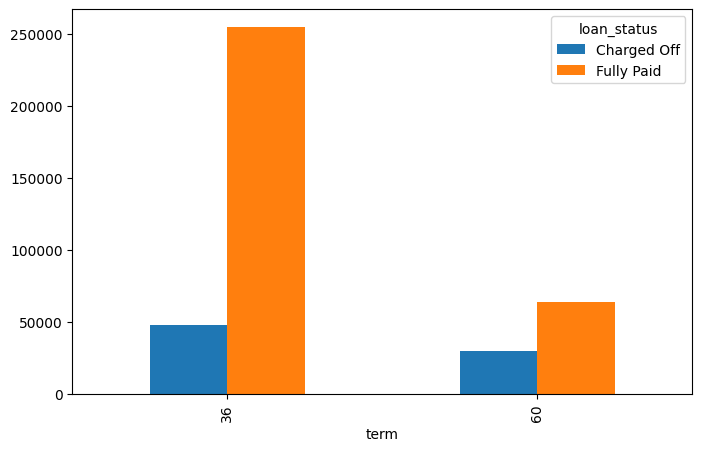

In [115]:
pd.crosstab(df.term,df.loan_status).plot(kind='bar')

<Axes: xlabel='verification_status'>

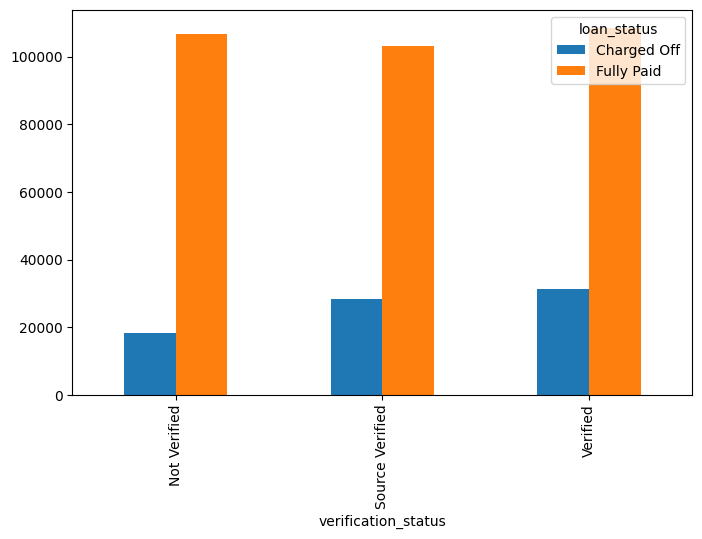

In [116]:
pd.crosstab(df.verification_status,df.loan_status).plot(kind='bar')

<Axes: xlabel='emp_length'>

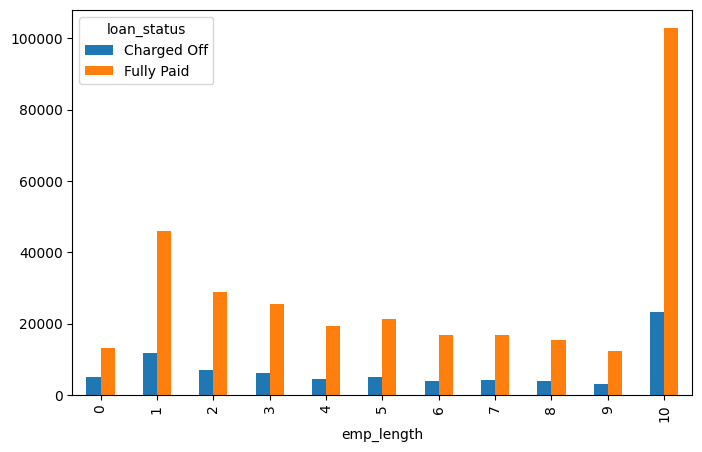

In [117]:
pd.crosstab(df.emp_length,df.loan_status).plot(kind='bar')

It is expected that people who are employed for a longer time have a high rate of paying back the loan. But still this doen'nt imply that there's a strong relationship between emp_length and being charged off.

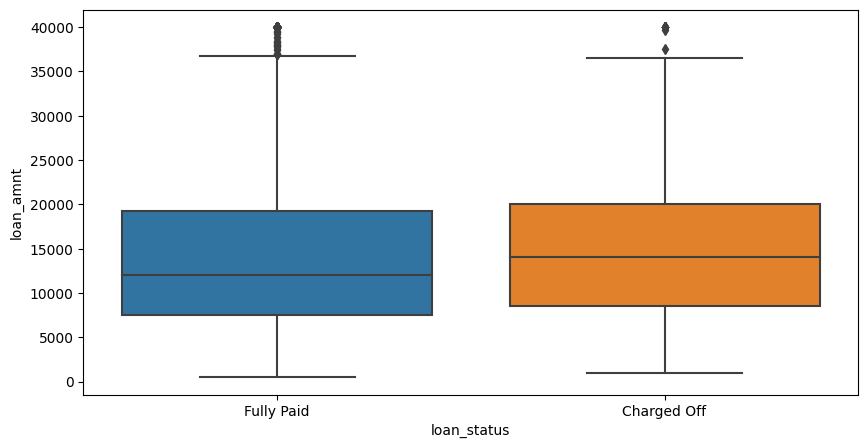

In [118]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'loan_status', y='loan_amnt', data = df)
plt.show()

They are almost equal in numbers. However the loans that were charged off are slightly greater based on the loan amount. This is evident as often it is hard to pay off loan that are high in amount.

# Presence of outliers and itstreatment

Outlier is a datapoint that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error. An outliercan cause serious problems in statisticalanalyses

In [30]:
df_features.skew().sort_values(ascending=False)

dti                     431.051225
annual_inc               41.042725
pub_rec                  16.576564
revol_bal                11.727515
pub_rec_bankruptcies      3.426277
mort_acc                  1.755865
term                      1.234225
open_acc                  1.213019
installment               0.983598
total_acc                 0.864328
loan_amnt                 0.777285
int_rate                  0.420669
earliest_cr_line          0.033481
revol_util               -0.071889
emp_length               -0.137970
dtype: float64

As our dataset is highly skewed, it has lot of outliers present. So, removing outliers through IQR/Z score  method doesn’t reduce the skewness and outliers at all

In [31]:
df_scaled = df.copy()
col_names=['dti','annual_inc','pub_rec','revol_bal','pub_rec_bankruptcies']
features = df_scaled[col_names]

In [32]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson',standardize=True)
df_scaled[col_names] = scaler.fit_transform(features.values)

In [33]:
df_scaled.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36,11.44,329.48,B,B4,10,RENT,1.145691,Not Verified,Fully Paid,vacation,1.034527,1990,16,-0.413212,1.372842,41.8,25,w,INDIVIDUAL,0.0,-0.358558,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36,11.99,265.68,B,B5,4,MORTGAGE,0.044891,Not Verified,Fully Paid,debt_consolidation,0.628529,2023,17,-0.413212,0.620884,53.3,27,f,INDIVIDUAL,3.0,-0.358558,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36,10.49,506.97,B,B3,1,RENT,-0.750641,Source Verified,Fully Paid,credit_card,-0.436629,2023,13,-0.413212,0.049770,92.2,26,f,INDIVIDUAL,0.0,-0.358558,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36,6.49,220.65,A,A2,6,RENT,-0.310717,Not Verified,Fully Paid,credit_card,-2.256316,2023,6,-0.413212,-0.681217,21.5,13,f,INDIVIDUAL,0.0,-0.358558,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60,17.27,609.33,C,C5,9,MORTGAGE,-0.275340,Verified,Charged Off,credit_card,1.703356,1999,13,-0.413212,0.862231,69.8,43,f,INDIVIDUAL,1.0,-0.358558,"679 Luna Roads\r\nGreggshire, VA 11650"


In [34]:
df_scaled.skew().sort_values(ascending=False)

pub_rec_bankruptcies    2.430400
pub_rec                 2.006863
mort_acc                1.755865
term                    1.234225
open_acc                1.213019
dti                     1.187354
installment             0.983598
total_acc               0.864328
loan_amnt               0.777285
int_rate                0.420669
revol_bal               0.201524
earliest_cr_line        0.033481
annual_inc             -0.025971
revol_util             -0.071889
emp_length             -0.137970
dtype: float64

Hence power transformation is the best method to deal with outliers for this dataset.After applying power transformer we still observed very high skewness on few columns and further log transformation was applied to reduce the skewness and now skewness of all the columns is between 0 and 2.

<AxesSubplot:>

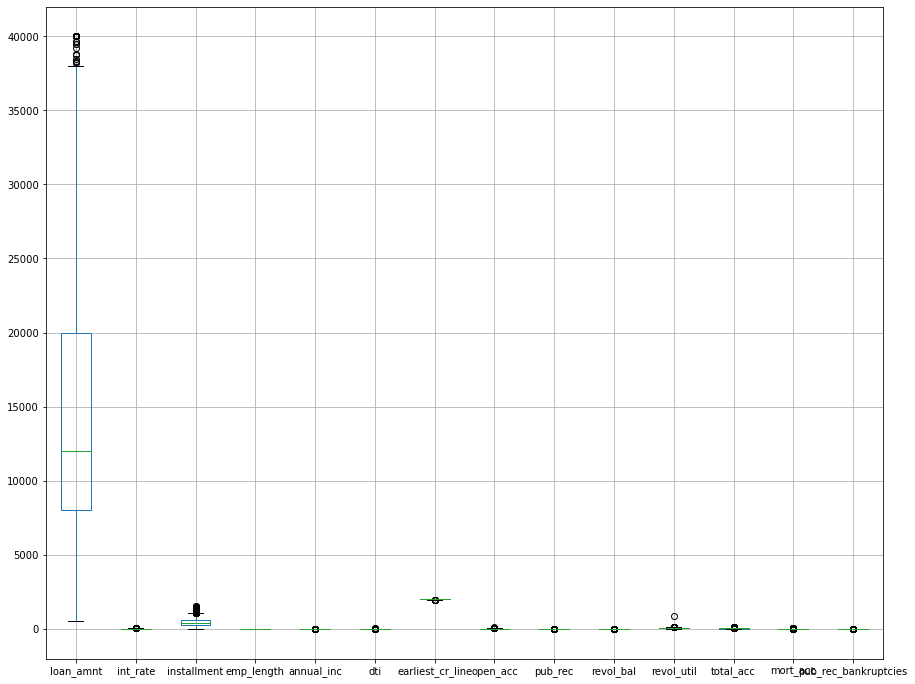

In [ ]:
df_scaled.boxplot()

In [35]:
df_scaled.shape

(396030, 24)

# scaling

In [36]:
scalar = MinMaxScaler()
df_scaled[['loan_amnt']] = scalar.fit_transform(df_scaled[['loan_amnt']])
df_scaled[['int_rate']] = scalar.fit_transform(df_scaled[['int_rate']])
df_scaled[['installment']] = scalar.fit_transform(df_scaled[['installment']])
df_scaled[['open_acc']] = scalar.fit_transform(df_scaled[['open_acc']])
df_scaled[['revol_util']] = scalar.fit_transform(df_scaled[['revol_util']])
df_scaled[['total_acc']] = scalar.fit_transform(df_scaled[['total_acc']])

In [37]:
df_scaled.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0.240506,36,0.238411,0.206493,B,B4,10,RENT,1.145691,Not Verified,Fully Paid,vacation,1.034527,1990,0.177778,-0.413212,1.372842,0.046845,0.154362,w,INDIVIDUAL,0.0,-0.358558,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,0.189873,36,0.259836,0.164456,B,B5,4,MORTGAGE,0.044891,Not Verified,Fully Paid,debt_consolidation,0.628529,2023,0.188889,-0.413212,0.620884,0.059733,0.167785,f,INDIVIDUAL,3.0,-0.358558,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,0.382278,36,0.201402,0.323437,B,B3,1,RENT,-0.750641,Source Verified,Fully Paid,credit_card,-0.436629,2023,0.144444,-0.413212,0.049770,0.103328,0.161074,f,INDIVIDUAL,0.0,-0.358558,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,0.169620,36,0.045578,0.134787,A,A2,6,RENT,-0.310717,Not Verified,Fully Paid,credit_card,-2.256316,2023,0.066667,-0.413212,-0.681217,0.024095,0.073826,f,INDIVIDUAL,0.0,-0.358558,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,0.604430,60,0.465524,0.390880,C,C5,9,MORTGAGE,-0.275340,Verified,Charged Off,credit_card,1.703356,1999,0.144444,-0.413212,0.862231,0.078225,0.275168,f,INDIVIDUAL,1.0,-0.358558,"679 Luna Roads\r\nGreggshire, VA 11650"


# feature engineering

In [38]:
df_numerical=df_scaled.select_dtypes(include=np.number)
df_categorical=df_scaled.select_dtypes(include=object)

In [39]:
df_numerical.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [40]:
df_categorical.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

**We already know that grade is a part of sub-grades. We will get better information from sub grades rateher than grades. We will just droop that column.**

In [41]:
df_categorical = df_categorical.drop('grade', axis = 1)

In [42]:
df_categorical.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Here , 'None' and 'Any' category have very few data and essentially they can be grouped with 'Other' category also.
Then we can convert this feature into dummy variables.

In [43]:
df_categorical['home_ownership'] = df_categorical['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [44]:
df_categorical.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [45]:
# from sklearn.preprocessing import LabelEncoder
# label=LabelEncoder()
# df_categorical['home_ownership']=label.fit_transform(df_categorical['home_ownership'].values.reshape(-1,1))

In [46]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal=OrdinalEncoder()
# df_categorical['sub_grade']=ordinal.fit_transform(df_categorical['sub_grade'].values.reshape(-1,1))

In [47]:
df_dummy=pd.get_dummies(data=df_categorical,columns=['verification_status','initial_list_status','application_type','home_ownership','purpose','sub_grade'],drop_first=True)

In [48]:
# df_dummy['purpose']=df_dummy['purpose'].replace(df_dummy.purpose.value_counts(1))
# df_dummy['sub_grade']=df_dummy['sub_grade'].replace(df_dummy.sub_grade.value_counts(1))

In [49]:
#from sklearn.preprocessing import OneHotEncoder
#ohc= OneHotEncoder()
#encoded = ohc.fit_transform(df_categorical.verification_status.values.reshape(-1,1)).toarray()
#encoded
#df_EN = pd.DataFrame(encoded,columns=['Verified','Source Verified','Not Verified'])
#df_EN.head()

In [50]:
df_dummy.head(2)

,term,loan_status,address,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,36,Fully Paid,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,Fully Paid,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df = pd.concat([df_numerical,df_dummy], axis = 1)

In [52]:
df.head(2)

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term,loan_status,address,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,0.240506,0.238411,0.206493,10,1.145691,1.034527,1990,0.177778,-0.413212,1.372842,0.046845,0.154362,0.0,-0.358558,36,Fully Paid,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.189873,0.259836,0.164456,4,0.044891,0.628529,2023,0.188889,-0.413212,0.620884,0.059733,0.167785,3.0,-0.358558,36,Fully Paid,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(396030, 72)

In [54]:
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

**We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [55]:
# extracting zip code from address
df['zipcode']=df.address.apply(lambda x: x[-5:] )

In [56]:
# dummy encoding zip code
df=pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [57]:
df.drop('address',axis=1,inplace=True)

In [58]:
df.drop('emp_length',axis=1,inplace=True)


In [59]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term,loan_status,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,0.240506,0.238411,0.206493,1.145691,1.034527,1990,0.177778,-0.413212,1.372842,0.046845,0.154362,0.0,-0.358558,36,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.189873,0.259836,0.164456,0.044891,0.628529,2023,0.188889,-0.413212,0.620884,0.059733,0.167785,3.0,-0.358558,36,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.382278,0.201402,0.323437,-0.750641,-0.436629,2023,0.144444,-0.413212,0.049770,0.103328,0.161074,0.0,-0.358558,36,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.169620,0.045578,0.134787,-0.310717,-2.256316,2023,0.066667,-0.413212,-0.681217,0.024095,0.073826,0.0,-0.358558,36,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.604430,0.465524,0.390880,-0.275340,1.703356,1999,0.144444,-0.413212,0.862231,0.078225,0.275168,1.0,-0.358558,60,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
df.shape

(396030, 79)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   dti                                  396030 non-null  float64
 5   earliest_cr_line                     396030 non-null  int32  
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   revol_util                           396030 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

In [62]:
df.term=df.term.astype(int)

# 8. Statistical significance of variable:

In [63]:
X=df.drop('loan_status',axis=1)
y=df.loan_status

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from scipy.stats import ttest_ind
ttest_ind(X,X_train)

Ttest_indResult(statistic=array([ 0.09161748, -0.19637825,  0.11963388,  0.15783425,  0.59624798,
       -0.20212718, -0.59065362,  0.06832807, -0.68625085,  0.78725527,
        0.82874387,  0.40512716,  0.16495332, -0.56126512, -0.31660404,
        0.06032945, -0.25580912, -0.58953839,  0.18197377,  0.24563194,
        0.55443694, -0.12300347, -0.62642127,  0.39842124,  0.09751752,
       -0.23343028, -0.40849202, -0.72726583,  0.65401679, -0.40892917,
       -0.12390313, -0.26204424,  0.116528  , -0.18696181,  0.02600248,
       -0.01294946, -0.41784315,  0.13739317,  0.22571523, -0.10207115,
        0.23352633,  0.63326359, -0.21793724, -0.28005967,  0.0730126 ,
        0.66088539, -0.16328524, -0.38328365, -0.54788663,  0.78518016,
        0.33399036, -0.60983104,  0.60829007, -0.06117909,  0.00942405,
       -0.45821924, -1.06193388, -0.0246259 ,  0.14757865,  0.1965417 ,
       -0.16709166,  0.37164815,  0.44743049, -0.28411021, -0.27208779,
       -0.0394933 ,  0.36241961,  0.56

In [63]:
ttest_ind(X,X_test)

Ttest_indResult(statistic=array([-0.15995158,  0.34317124, -0.20888573, -0.27571817, -1.04160001,
        0.35473939,  1.03243854, -0.11959392,  1.20068399, -1.37315188,
       -1.44797117, -0.70802641, -0.28830165,  0.98198994,  0.55329565,
       -0.1053776 ,  0.44692829,  1.03009649, -0.31948071, -0.42532379,
       -0.93674501,  0.21494712,  1.09454566, -0.69549385, -0.17035007,
        0.4121969 ,  0.71481508,  1.28502059, -1.13675982,  0.71761589,
        0.2168012 ,  0.45829744, -0.20258794,  0.32717012, -0.04540342,
        0.02262507,  0.73211641, -0.23976962, -0.39378557,  0.17838895,
       -0.40745088, -1.10303371,  0.38102836,  0.48977734, -0.12749535,
       -1.15110562,  0.28543477,  0.67071604,  0.9595635 , -1.36608395,
       -0.58234314,  1.06911722, -1.05844816,  0.10690994, -0.01646073,
        0.80338515,  1.87157881,  0.04302602, -0.25741282, -0.34259295,
        0.29247465, -0.6458494 , -0.77623865,  0.49874716,  0.47784346,
        0.06904838, -0.62696602, -0.97